# Hugging Face Diffusion Models

Visit the official quickstart page: 

https://huggingface.co/docs/diffusers/quicktour

In [1]:
# package to install
%pip install -q torch transformers diffusers accelerate

Note: you may need to restart the kernel to use updated packages.


In [2]:
# check torch cuda version
import torch

print(torch.__version__)
print(torch.version.cuda)

2.4.0+cu121
12.1


# Check Device

In [4]:
import torch

# check if the GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

Device: cuda


# Diffusion Pipeline

The DiffusionPipeline is the easiest way to use a pretrained diffusion system for inference. It is an end-to-end system containing the model and the scheduler.

- We will load the pretrained model from the `transformers` library.
- You can find the list of available models [here](https://huggingface.co/models?pipeline_tag=text-to-image&sort=trending).

| **Task**	| **Description**	| **Pipeline** |
| --- | --- | --- |
|Unconditional Image Generation	| generate an image from Gaussian noise	| [unconditional_image_generation](https://huggingface.co/docs/diffusers/using-diffusers/unconditional_image_generation) |
|Text-Guided Image Generation	|generate an image given a text prompt|	[conditional_image_generation](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)|
|Text-Guided Image-to-Image Translation	|adapt an image guided by a text prompt	|[img2img](https://huggingface.co/docs/diffusers/using-diffusers/img2img)|
|Text-Guided Image-Inpainting|	fill the masked part of an image given the image, the mask and a text prompt	|[inpaint](https://huggingface.co/docs/diffusers/using-diffusers/inpaint)|
|Text-Guided Depth-to-Image Translation	|adapt parts of an image guided by a text prompt while preserving structure via depth estimation|[depth2img](https://huggingface.co/docs/diffusers/using-diffusers/depth2img)|

# Text-to-Image Models

The most common text-to-image models are [Stable Diffusion v1.5](https://huggingface.co/runwayml/stable-diffusion-v1-5), Stable [Diffusion XL (SDXL)](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0), and [Kandinsky 2.2](https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder). There are also ControlNet models or adapters that can be used with text-to-image models for more direct control in generating images. 

In [9]:
from diffusers import DiffusionPipeline

# load the model
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

# move the model to the device
pipeline.to(device)

pipeline.enable_attention_slicing()  # enable attention slicing

Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:04,  1.42it/s]/home/littlefish/miniconda3/envs/huggingface/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


## Inference by prompting

 30%|███       | 15/50 [00:01<00:03, 10.75it/s]

100%|██████████| 50/50 [00:04<00:00, 10.67it/s]


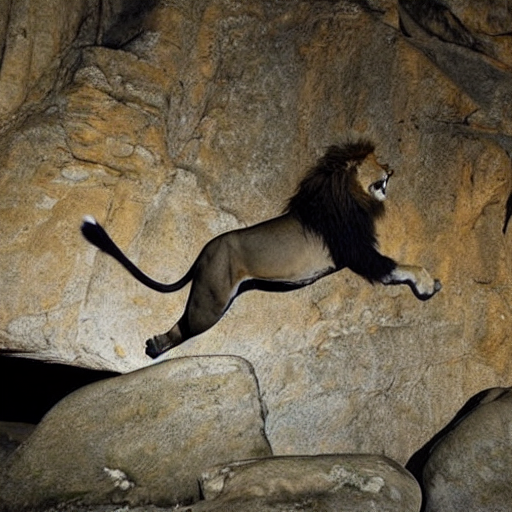

In [18]:
prompt = "A majestic lion jumping from a big stone at night"

image = pipeline(prompt).images[0]  # images' length is 1, so we get the first image
image

100%|██████████| 50/50 [00:05<00:00,  9.48it/s]


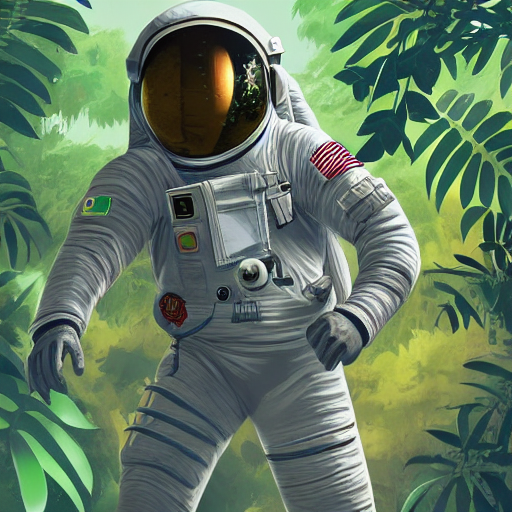

In [11]:
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k").images[0]
image

# Display the image

the image output is wrapped in a `PIL.Image` object.

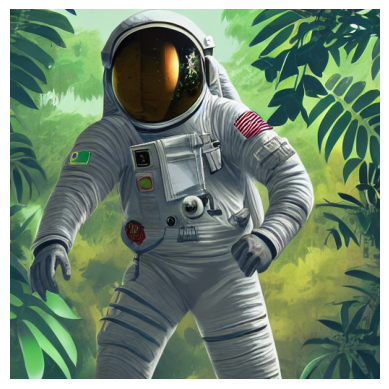

In [13]:
# display the image
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()

# Save the image

In [14]:
image.save("image.jpg")